In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import re



In [2]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import re

def load_all_aggregated_data() -> dict:
    """Load all aggregated data for various configurations: input dimensions, pseudo rehearsal, and optimizer.
    
    Returns:
    - all_data (dict): A nested dictionary with keys as input dimensions, pseudorehearsal, and optimizer 
                       and values as the loaded data.
    """
    all_data = {}
    save_folder = "aggregated_results"
    
    # Get all files in the folder with the .npy extension
    files = [f for f in os.listdir(save_folder) if f.endswith(".npy")]

    # Extract the configuration details from the file name using regex
    pattern = re.compile(r"input_dim_(\d+)_(True|False)_(\w+).npy")

    for file in files:
        match = pattern.match(file)
        if match:
            dim = int(match.group(1))
            pseudo_rehearsal = True if match.group(2) == 'True' else False
            optimizer = match.group(3)
            
            if dim not in all_data:
                all_data[dim] = {}
            
            if pseudo_rehearsal not in all_data[dim]:
                all_data[dim][pseudo_rehearsal] = {}
            
            save_path = os.path.join(save_folder, file)
            data = np.load(save_path, allow_pickle=True).item()
            all_data[dim][pseudo_rehearsal][optimizer] = data

    return all_data 

def get_perturbation_labels(output_dim: int = 1,
                            hidden_units_wide: int = 1000,
                            hidden_units_deep: int = 16,
                            hidden_layers: int = 8,
                            num_exps: int = 6) -> dict:
    """Generate dictionary of perturbation labels with given configurations."""
    
    model_descriptions = [
        'Linear Model',
        f"Wide ReLU ANN",
        f"Deep ReLU ANN",
        'One Parameter'
    ]

    for partition_num in [1, 2, 4, 8, 10]:
        model_descriptions.extend([
            f"Spline ANN (z={partition_num})",
            f"Lookup Table (z={partition_num})",
            f"ABEL-Spline (z={partition_num})"
        ])

    # Model perturbation labels
    perturbation_labels = {f"model_{i}_perturbations": desc for i, desc in enumerate(model_descriptions)}
    
    # Adding the distance labels
    perturbation_labels["min_distance"] = "Min Absolute Difference"
    perturbation_labels["max_distance"] = "Max Absolute Difference"

    return perturbation_labels

def create_nested_dataframe_dict(loaded_data_dict: dict) -> dict:
    """Create a nested dictionary of pandas DataFrames using loaded data."""
    return {
        dim: {
            pseudo: {
                optimizer: pd.DataFrame(data)
                for optimizer, data in optimizer_data.items()
            }
            for pseudo, optimizer_data in pseudo_rehearsal_data.items()
        }
        for dim, pseudo_rehearsal_data in loaded_data_dict.items()
    }


# Example usage:
perturbation_labels_dict = get_perturbation_labels()
for key, value in perturbation_labels_dict.items():
    print(f"{key} -> {value}")

# Example usage:
loaded_data_dict = load_all_aggregated_data()
#for dim, pseudo_rehearsal_data in loaded_data_dict.items():
#    for pseudo, optimizer_data in pseudo_rehearsal_data.items():
#        for optimizer, data in optimizer_data.items():
#            print(f"Data for dimension {dim}, pseudorehearsal: {pseudo}, 
# optimizer: {optimizer} has keys: \n\n {data.keys()} \n\n")

# Example usage:
df_dict = create_nested_dataframe_dict(loaded_data_dict)

df_dict[2][False]['sgd']

model_0_perturbations -> Linear Model
model_1_perturbations -> Wide ReLU ANN
model_2_perturbations -> Deep ReLU ANN
model_3_perturbations -> One Parameter
model_4_perturbations -> Spline ANN (z=1)
model_5_perturbations -> Lookup Table (z=1)
model_6_perturbations -> ABEL-Spline (z=1)
model_7_perturbations -> Spline ANN (z=2)
model_8_perturbations -> Lookup Table (z=2)
model_9_perturbations -> ABEL-Spline (z=2)
model_10_perturbations -> Spline ANN (z=4)
model_11_perturbations -> Lookup Table (z=4)
model_12_perturbations -> ABEL-Spline (z=4)
model_13_perturbations -> Spline ANN (z=8)
model_14_perturbations -> Lookup Table (z=8)
model_15_perturbations -> ABEL-Spline (z=8)
model_16_perturbations -> Spline ANN (z=10)
model_17_perturbations -> Lookup Table (z=10)
model_18_perturbations -> ABEL-Spline (z=10)
min_distance -> Min Absolute Difference
max_distance -> Max Absolute Difference


,min_distance,max_distance,model_0_perturbations,model_1_perturbations,model_2_perturbations,model_3_perturbations,model_4_perturbations,model_5_perturbations,model_6_perturbations,model_7_perturbations,...,model_9_perturbations,model_10_perturbations,model_11_perturbations,model_12_perturbations,model_13_perturbations,model_14_perturbations,model_15_perturbations,model_16_perturbations,model_17_perturbations,model_18_perturbations
0,0.035585,0.167891,1.245116,1.544701,0.931856,0.674209,0.605180,0.674209,0.555569,0.414020,...,0.388538,2.507716e-01,0.0,2.487381e-01,0.152887,0.0,0.138202,0.080627,0.0,0.079088
1,0.196814,0.378473,0.688618,0.767363,0.599516,0.674209,0.293359,0.674209,0.267573,0.057599,...,0.052254,3.054738e-07,0.0,9.685755e-08,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2,0.154573,0.507587,0.570547,0.684640,0.588339,0.674209,0.274309,0.674209,0.249163,0.121663,...,0.112613,3.702011e-03,0.0,3.708810e-03,0.000000,0.0,0.000000,0.000000,0.0,0.000000
3,0.409346,0.496235,0.502708,0.745193,0.742521,0.674209,0.072769,0.674209,0.066116,0.000005,...,0.000004,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4,0.577513,0.667820,0.233487,0.690886,0.818779,0.674209,0.004181,0.674209,0.003764,0.000000,...,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0.017709,0.276512,1.233519,1.106592,0.636997,0.639778,0.465521,0.639778,0.438204,0.329956,...,0.322215,3.436519e-01,0.0,2.730608e-01,0.236388,0.0,0.199417,0.256217,0.0,0.215819
149996,0.702496,0.709166,0.065053,0.352558,0.624539,0.639778,0.000129,0.639778,0.000118,0.000000,...,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.0,0.000000
149997,0.335874,0.343912,0.614290,0.523514,0.619572,0.639778,0.181699,0.639778,0.170919,0.000914,...,0.000893,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.0,0.000000
149998,0.000275,0.506600,0.875792,0.797800,0.623123,0.639778,0.355417,0.639778,0.336025,0.329883,...,0.319929,3.510558e-01,0.0,2.817186e-01,0.306624,0.0,0.259669,0.337460,0.0,0.283789


In [31]:
import pandas as pd

# Create a list of model names corresponding to ABEL-Splines
abel_spline_models = [f"model_{i}_perturbations" for i in range(6, 19, 3)]

# Initialize an empty dataframe
df = pd.DataFrame()

# Loop through the ABEL-Spline models and add their perturbation values to the dataframe
for model_name in abel_spline_models:
    perturbation_values = df_dict[3][False]['sgd'][model_name]  # Replace with desired dimension and optimizer
    
    # Extract partition number from model name using regex
    partition_num = int(re.search(r'\(z=(\d+)\)', perturbation_labels_dict[model_name]).group(1))
    
    # Add perturbation values to the dataframe with partition number as column name
    df[perturbation_labels_dict[model_name]] = perturbation_values

# Print the resulting dataframe
df

,ABEL-Spline (z=1),ABEL-Spline (z=2),ABEL-Spline (z=4),ABEL-Spline (z=8),ABEL-Spline (z=10)
0,0.092043,0.026923,0.000228,0.000000,0.000000e+00
1,0.127124,0.101816,0.094906,0.102542,1.297292e-01
2,0.184058,0.154440,0.086599,0.025551,1.707236e-02
3,0.111192,0.027734,0.000313,0.000000,0.000000e+00
4,0.159377,0.096533,0.022305,0.000130,4.470348e-08
...,...,...,...,...,...
149995,0.135939,0.053412,0.010822,0.000381,5.489588e-05
149996,0.159287,0.095560,0.035893,0.016845,5.278248e-03
149997,0.071619,0.046955,0.029181,0.043713,4.335697e-02
149998,0.049212,0.007613,0.000000,0.000000,0.000000e+00


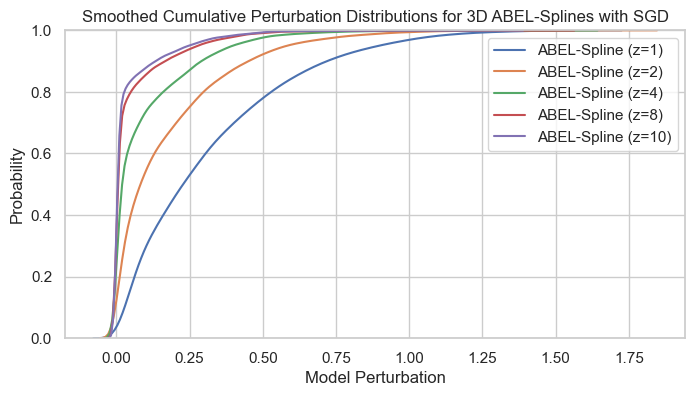

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the cumulative distribution for each partition number
cumulative_distributions = df.apply(lambda x: x.value_counts(normalize=True).sort_index().cumsum())

# Plot the cumulative distributions using a smoothed KDE
sns.set(style="whitegrid")
plt.figure(figsize=(8,4))
# Iterate through each partition number and plot its cumulative distribution using a smoothed KDE
for partition_num in [1, 2, 4, 8, 10]:
    sns.kdeplot(df[f"ABEL-Spline (z={partition_num})"], cumulative=True,
                label=f"ABEL-Spline (z={partition_num})")

plt.title("Smoothed Cumulative Perturbation Distributions for 3D ABEL-Splines with SGD")
plt.xlabel("Model Perturbation")
plt.ylabel("Probability")
plt.ylim(0, 1)
plt.legend()
plt.show()

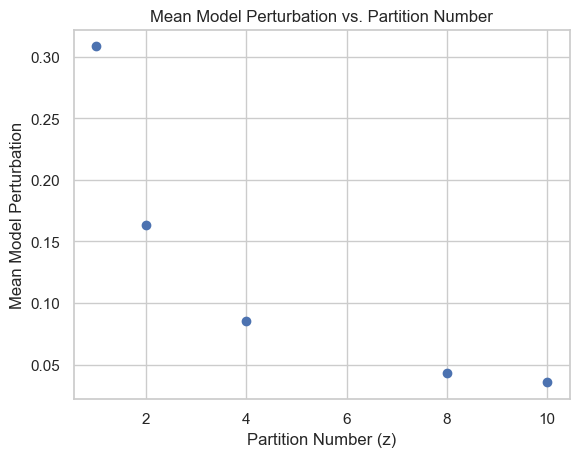

In [25]:
import matplotlib.pyplot as plt

# Calculate the mean perturbation values for each partition number
mean_perturbations = [df[label].mean() for label in df.columns]

# Create a scatterplot
plt.scatter([1, 2, 4, 8, 10], mean_perturbations)
plt.xlabel('Partition Number (z)')
plt.ylabel('Mean Model Perturbation')
plt.title('Mean Model Perturbation vs. Partition Number')
plt.show()

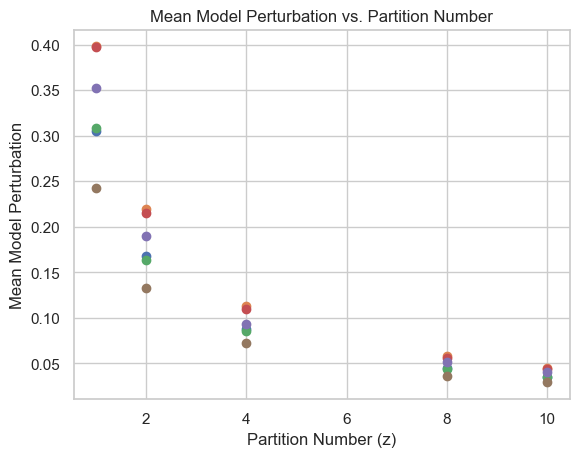

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

for input_dimension in range(1,7):
    # Create a list of model names corresponding to ABEL-Splines
    abel_spline_models = [f"model_{i}_perturbations" for i in range(6, 19, 3)]

    # Initialize an empty dataframe
    df = pd.DataFrame()

    # Loop through the ABEL-Spline models and add their perturbation values to the dataframe
    for model_name in abel_spline_models:
        perturbation_values = df_dict[input_dimension][False]['sgd'][model_name]  # Replace with desired dimension and optimizer

        # Extract partition number from model name using regex
        partition_num = int(re.search(r'\(z=(\d+)\)', perturbation_labels_dict[model_name]).group(1))

        # Add perturbation values to the dataframe with partition number as column name
        df[perturbation_labels_dict[model_name]] = perturbation_values


    # Calculate the mean perturbation values for each partition number
    mean_perturbations = [df[label].mean() for label in df.columns]

    # Create a scatterplot
    plt.scatter([1, 2, 4, 8, 10], mean_perturbations)
plt.xlabel('Partition Number (z)')
plt.ylabel('Mean Model Perturbation')
plt.title('Mean Model Perturbation vs. Partition Number')
plt.show()
# Print the resulting dataframe
#

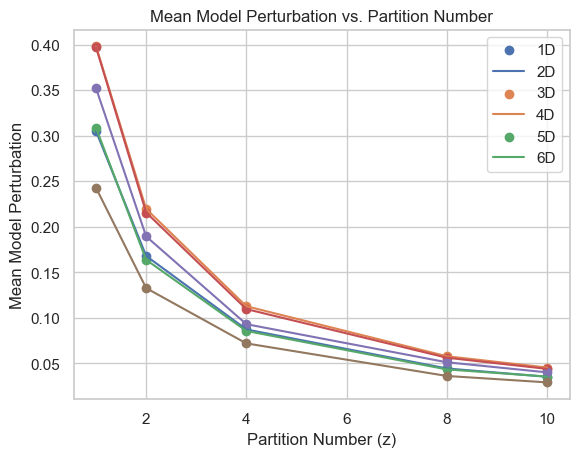

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

dimensions = ['1D', '2D', '3D', '4D', '5D', '6D']

for input_dimension in range(1, 7):
    # Create a list of model names corresponding to ABEL-Splines
    abel_spline_models = [f"model_{i}_perturbations" for i in range(6, 19, 3)]

    # Initialize an empty dataframe
    df = pd.DataFrame()

    # Loop through the ABEL-Spline models and add their perturbation values to the dataframe
    for model_name in abel_spline_models:
        perturbation_values = df_dict[input_dimension][False]['sgd'][model_name]  # Replace with desired dimension and optimizer

        # Extract partition number from model name using regex
        partition_num = int(re.search(r'\(z=(\d+)\)', perturbation_labels_dict[model_name]).group(1))

        # Add perturbation values to the dataframe with partition number as column name
        df[perturbation_labels_dict[model_name]] = perturbation_values

    # Calculate the mean perturbation values for each partition number
    mean_perturbations = [df[label].mean() for label in df.columns]

    # Create a scatterplot with lineplot connecting the points
    plt.scatter([1, 2, 4, 8, 10], mean_perturbations)
    plt.plot([1, 2, 4, 8, 10], mean_perturbations)
    
plt.xlabel('Partition Number (z)')
plt.ylabel('Mean Model Perturbation')
plt.title('Mean Model Perturbation vs. Partition Number')

# Add legend for dimensions
plt.legend(dimensions)

plt.show()

C:\Users\Heinrich\AppData\Local\Temp\ipykernel_20036\1413998694.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('winter', len(dimensions)+1)


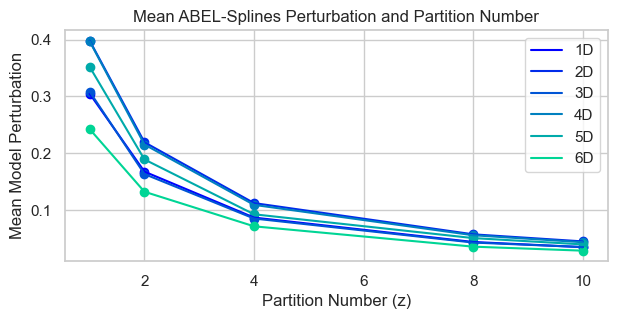

In [87]:


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

dimensions = ['1D', '2D', '3D', '4D', '5D', '6D']

# Create a color map with a gradient based on the number of dimensions
#color_map = cm.get_cmap('viridis', len(dimensions))
# Create a color map with a gradient based on the number of dimensions
color_map = cm.get_cmap('winter', len(dimensions)+1)

plt.figure(figsize=(7,3))


for i, input_dimension in enumerate(range(1, 7)):
    # Create a list of model names corresponding to ABEL-Splines
    abel_spline_models = [f"model_{i}_perturbations" for i in range(6, 19, 3)]

    # Initialize an empty dataframe
    df = pd.DataFrame()

    # Loop through the ABEL-Spline models and add their perturbation values to the dataframe
    for model_name in abel_spline_models:
        perturbation_values = df_dict[input_dimension][False]['sgd'][model_name]  # Replace with desired dimension and optimizer

        # Extract partition number from model name using regex
        partition_num = int(re.search(r'\(z=(\d+)\)', perturbation_labels_dict[model_name]).group(1))

        # Add perturbation values to the dataframe with partition number as column name
        df[perturbation_labels_dict[model_name]] = perturbation_values

    # Calculate the mean perturbation values for each partition number
    mean_perturbations = [df[label].mean() for label in df.columns]

    # Create a scatterplot with lineplot connecting the points, using the same color for both
    color = color_map(i)  # Get color from colormap based on dimension index
    #plt.scatter([1, 2, 4, 8, 10], mean_perturbations, color=color, label=None)
    plt.plot([1, 2, 4, 8, 10], mean_perturbations, color=color)
    
plt.legend(dimensions, loc='upper right')

for i, input_dimension in enumerate(range(1, 7)):
    # Create a list of model names corresponding to ABEL-Splines
    abel_spline_models = [f"model_{i}_perturbations" for i in range(6, 19, 3)]

    # Initialize an empty dataframe
    df = pd.DataFrame()

    # Loop through the ABEL-Spline models and add their perturbation values to the dataframe
    for model_name in abel_spline_models:
        perturbation_values = df_dict[input_dimension][False]['sgd'][model_name]  # Replace with desired dimension and optimizer

        # Extract partition number from model name using regex
        partition_num = int(re.search(r'\(z=(\d+)\)', perturbation_labels_dict[model_name]).group(1))

        # Add perturbation values to the dataframe with partition number as column name
        df[perturbation_labels_dict[model_name]] = perturbation_values

    # Calculate the mean perturbation values for each partition number
    mean_perturbations = [df[label].mean() for label in df.columns]

    # Create a scatterplot with lineplot connecting the points, using the same color for both
    color = color_map(i)  # Get color from colormap based on dimension index
    plt.scatter([1, 2, 4, 8, 10], mean_perturbations, color=color, label=None)
    #plt.plot([1, 2, 4, 8, 10], mean_perturbations, color=color)
    


plt.xlabel('Partition Number (z)')
plt.ylabel('Mean Model Perturbation')
plt.title('Mean ABEL-Splines Perturbation and Partition Number')

plt.savefig("abel_spline_line_plot_partition_number_influence", dpi=300, bbox_inches='tight')

plt.show()



C:\Users\Heinrich\AppData\Local\Temp\ipykernel_20036\3805104184.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('viridis', len(dimensions))
C:\Users\Heinrich\AppData\Local\Temp\ipykernel_20036\3805104184.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('winter', len(dimensions))


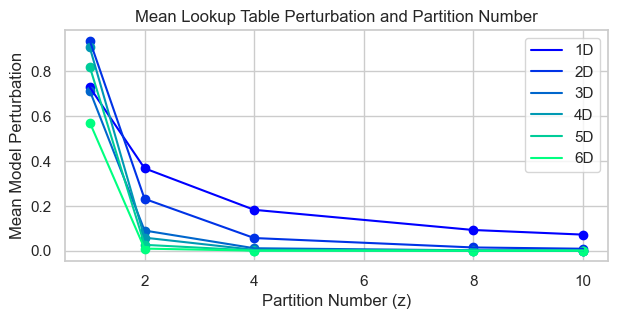

In [88]:


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

dimensions = ['1D', '2D', '3D', '4D', '5D', '6D']

# Create a color map with a gradient based on the number of dimensions
color_map = cm.get_cmap('viridis', len(dimensions))
color_map = cm.get_cmap('winter', len(dimensions))

plt.figure(figsize=(7,3))

for i, input_dimension in enumerate(range(1, 7)):
    # Create a list of model names corresponding to ABEL-Splines
    abel_spline_models = [f"model_{i}_perturbations" for i in range(5, 19, 3)]

    # Initialize an empty dataframe
    df = pd.DataFrame()

    # Loop through the ABEL-Spline models and add their perturbation values to the dataframe
    for model_name in abel_spline_models:
        perturbation_values = df_dict[input_dimension][False]['sgd'][model_name]  # Replace with desired dimension and optimizer

        # Extract partition number from model name using regex
        partition_num = int(re.search(r'\(z=(\d+)\)', perturbation_labels_dict[model_name]).group(1))

        # Add perturbation values to the dataframe with partition number as column name
        df[perturbation_labels_dict[model_name]] = perturbation_values

    # Calculate the mean perturbation values for each partition number
    mean_perturbations = [df[label].mean() for label in df.columns]

    # Create a scatterplot with lineplot connecting the points, using the same color for both
    color = color_map(i)  # Get color from colormap based on dimension index
    #plt.scatter([1, 2, 4, 8, 10], mean_perturbations, color=color, label=None)
    plt.plot([1, 2, 4, 8, 10], mean_perturbations, color=color)
    
plt.legend(dimensions, loc='upper right')

for i, input_dimension in enumerate(range(1, 7)):
    # Create a list of model names corresponding to ABEL-Splines
    abel_spline_models = [f"model_{i}_perturbations" for i in range(5, 19, 3)]

    # Initialize an empty dataframe
    df = pd.DataFrame()

    # Loop through the ABEL-Spline models and add their perturbation values to the dataframe
    for model_name in abel_spline_models:
        perturbation_values = df_dict[input_dimension][False]['sgd'][model_name]  # Replace with desired dimension and optimizer

        # Extract partition number from model name using regex
        partition_num = int(re.search(r'\(z=(\d+)\)', perturbation_labels_dict[model_name]).group(1))

        # Add perturbation values to the dataframe with partition number as column name
        df[perturbation_labels_dict[model_name]] = perturbation_values

    # Calculate the mean perturbation values for each partition number
    mean_perturbations = [df[label].mean() for label in df.columns]

    # Create a scatterplot with lineplot connecting the points, using the same color for both
    color = color_map(i)  # Get color from colormap based on dimension index
    plt.scatter([1, 2, 4, 8, 10], mean_perturbations, color=color, label=None)
    #plt.plot([1, 2, 4, 8, 10], mean_perturbations, color=color)
    


plt.xlabel('Partition Number (z)')
plt.ylabel('Mean Model Perturbation')
plt.title('Mean Lookup Table Perturbation and Partition Number')

plt.savefig("lookup_line_plot_partition_number_influence", dpi=300, bbox_inches='tight')

plt.show()



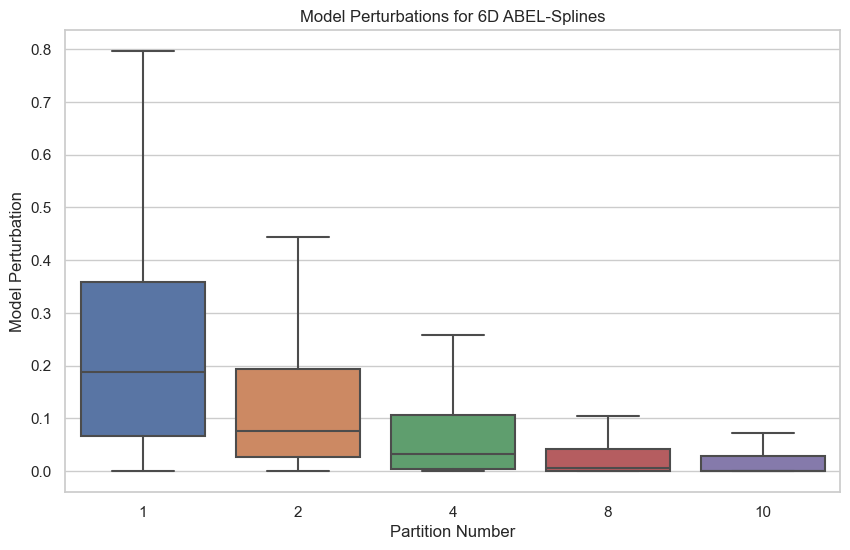

In [40]:
input_dimension = 6


import pandas as pd

# Create a list of model names corresponding to ABEL-Splines
abel_spline_models = [f"model_{i}_perturbations" for i in range(6, 19, 3)]

# Initialize an empty dataframe
df = pd.DataFrame()

# Loop through the ABEL-Spline models and add their perturbation values to the dataframe
for model_name in abel_spline_models:
    perturbation_values = df_dict[input_dimension][False]['sgd'][model_name]  # Replace with desired dimension and optimizer
    
    # Extract partition number from model name using regex
    partition_num = int(re.search(r'\(z=(\d+)\)', perturbation_labels_dict[model_name]).group(1))
    
    # Add perturbation values to the dataframe with partition number as column name
    df[perturbation_labels_dict[model_name]] = perturbation_values

# Print the resulting dataframe
#df


import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of partition numbers
partition_numbers = [1, 2, 4, 8, 10]

# Initialize an empty list to store perturbation values for each partition number
perturbation_values_per_partition = []

# Loop through the partition numbers and extract the corresponding perturbation values from the dataframe
for partition_num in partition_numbers:
    column_name = f"ABEL-Spline (z={partition_num})"
    perturbation_values = df[column_name]
    perturbation_values_per_partition.append(perturbation_values)

# Create a boxplot using seaborn with showfliers=False
plt.figure(figsize=(10, 6))
sns.boxplot(data=perturbation_values_per_partition, showfliers=False)
plt.xlabel("Partition Number")
plt.ylabel("Model Perturbation")
plt.title(f"Model Perturbations for {input_dimension}D ABEL-Splines")
plt.xticks(range(len(partition_numbers)), partition_numbers)
plt.show()

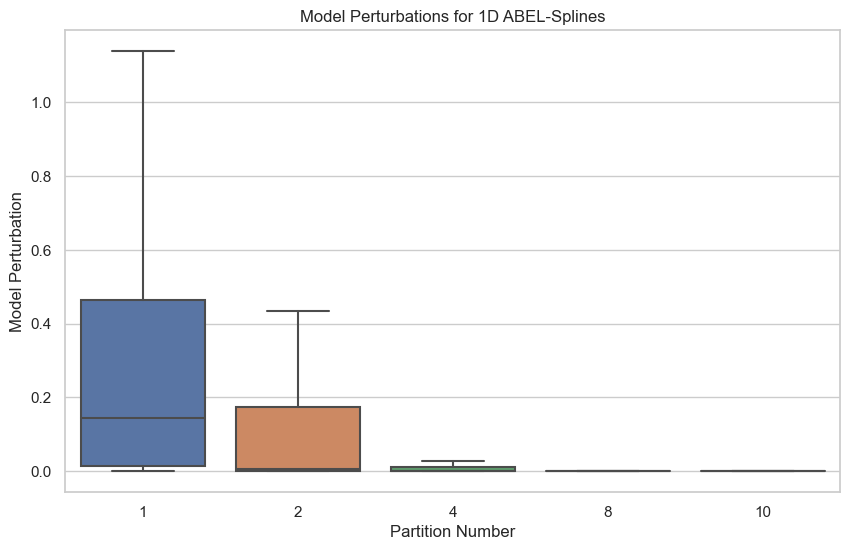

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_whisker_plot(input_dimension: int):
    # Create a list of model names corresponding to ABEL-Splines
    abel_spline_models = [f"model_{i}_perturbations" for i in range(6, 19, 3)]

    # Initialize an empty dataframe
    df = pd.DataFrame()

    # Loop through the ABEL-Spline models and add their perturbation values to the dataframe
    for model_name in abel_spline_models:
        perturbation_values = df_dict[input_dimension][False]['sgd'][model_name]  # Replace with desired dimension and optimizer

        # Extract partition number from model name using regex
        partition_num = int(re.search(r'\(z=(\d+)\)', perturbation_labels_dict[model_name]).group(1))

        # Add perturbation values to the dataframe with partition number as column name
        df[perturbation_labels_dict[model_name]] = perturbation_values

    # Create a list of partition numbers
    partition_numbers = [1, 2, 4, 8, 10]

    # Initialize an empty list to store perturbation values for each partition number
    perturbation_values_per_partition = []

    # Loop through the partition numbers and extract the corresponding perturbation values from the dataframe
    for partition_num in partition_numbers:
        column_name = f"ABEL-Spline (z={partition_num})"
        perturbation_values = df[column_name]
        perturbation_values_per_partition.append(perturbation_values)

    # Create a boxplot using seaborn with showfliers=False
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=perturbation_values_per_partition, showfliers=False, fliersize=10)
    plt.xlabel("Partition Number")
    plt.ylabel("Model Perturbation")
    plt.title(f"Model Perturbations for {input_dimension}D ABEL-Splines")
    plt.xticks(range(len(partition_numbers)), partition_numbers)
    
    # Save the plot as a PNG file with tight layout and 300 dpi
    output_file = f"whisker_plot_{input_dimension}D.png"
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()

# Example usage:
create_whisker_plot(1)


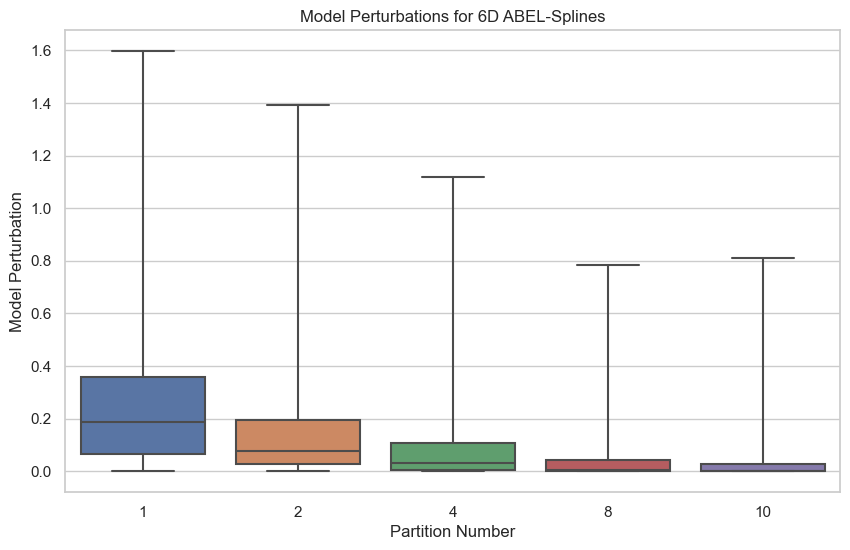

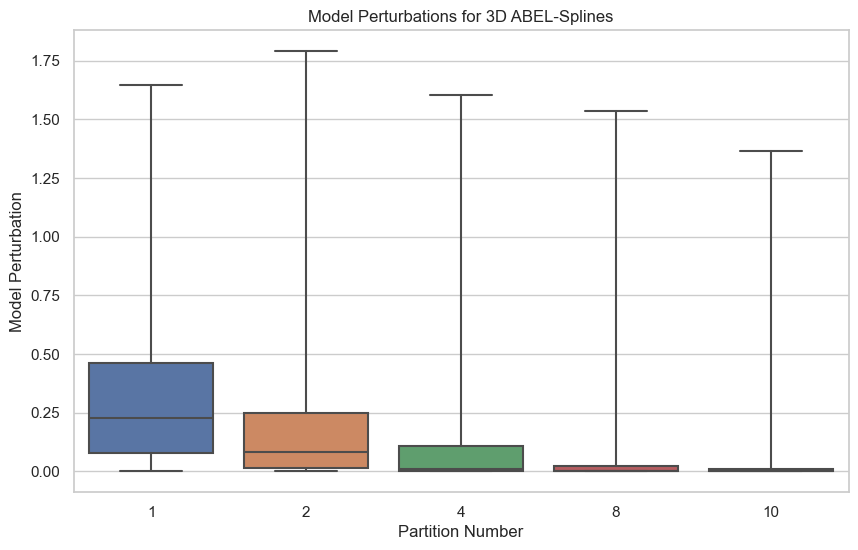

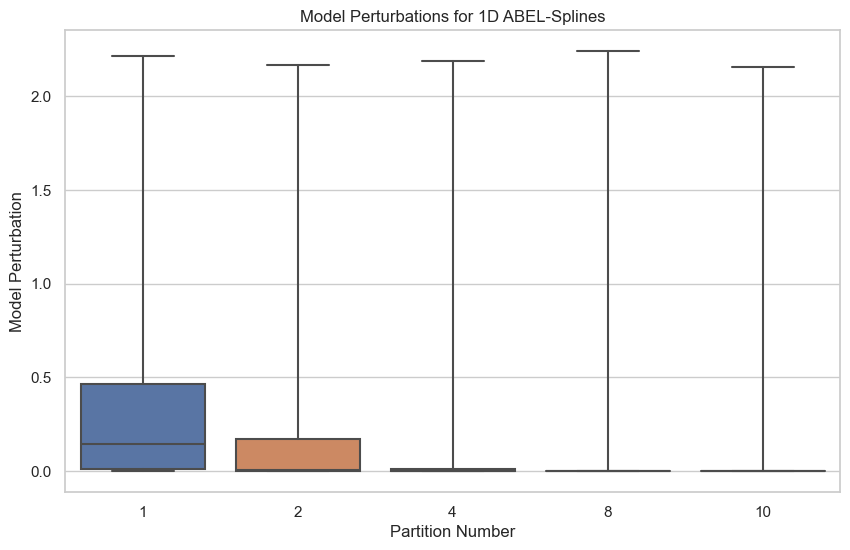

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_whisker_plot(input_dimension: int):
    # Create a list of model names corresponding to ABEL-Splines
    abel_spline_models = [f"model_{i}_perturbations" for i in range(6, 19, 3)]

    # Initialize an empty dataframe
    df = pd.DataFrame()

    # Loop through the ABEL-Spline models and add their perturbation values to the dataframe
    for model_name in abel_spline_models:
        perturbation_values = df_dict[input_dimension][False]['sgd'][model_name]  # Replace with desired dimension and optimizer

        # Extract partition number from model name using regex
        partition_num = int(re.search(r'\(z=(\d+)\)', perturbation_labels_dict[model_name]).group(1))

        # Add perturbation values to the dataframe with partition number as column name
        df[perturbation_labels_dict[model_name]] = perturbation_values

    # Create a list of partition numbers
    partition_numbers = [1, 2, 4, 8, 10]

    # Initialize an empty list to store perturbation values for each partition number
    perturbation_values_per_partition = []

    # Loop through the partition numbers and extract the corresponding perturbation values from the dataframe
    for partition_num in partition_numbers:
        column_name = f"ABEL-Spline (z={partition_num})"
        perturbation_values = df[column_name]
        perturbation_values_per_partition.append(perturbation_values)

    # Create a boxplot using seaborn with whis set to a high value
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=perturbation_values_per_partition,showfliers=False, whis=(0.,100.))
    plt.xlabel("Partition Number")
    plt.ylabel("Model Perturbation")
    plt.title(f"Model Perturbations for {input_dimension}D ABEL-Splines")
    plt.xticks(range(len(partition_numbers)), partition_numbers)
    
    # Save the plot as a PNG file with tight layout and 300 dpi
    output_file = f"whisker_plot_{input_dimension}D.png"
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()

# Example usage:
create_whisker_plot(6)
create_whisker_plot(3)
create_whisker_plot(1)

C:\Users\Heinrich\AppData\Local\Temp\ipykernel_20036\1855253522.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('winter', len(partitions)+1)


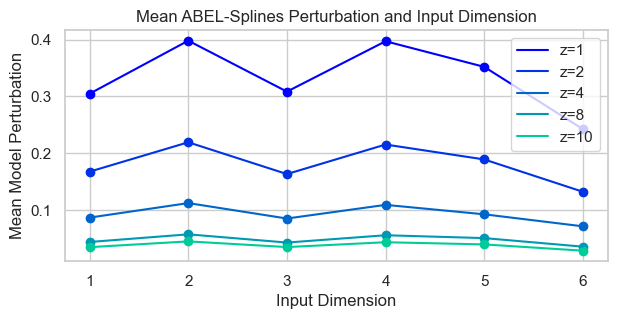

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

partitions = [1, 2, 4, 8, 10]

# Create a color map with a gradient based on the number of partitions
color_map = cm.get_cmap('winter', len(partitions)+1)

plt.figure(figsize=(7,3))

for i, partition in enumerate(partitions):
    # Create a list of model names corresponding to ABEL-Splines for the current partition
    abel_spline_models = [f"model_{i}_perturbations" for i in range(6 + (i*3), 19, 15)]

    # Initialize an empty dataframe
    df = pd.DataFrame()

    # Loop through the dimensions and add their perturbation values to the dataframe
    for input_dimension in range(1, 7):
        perturbation_values = df_dict[input_dimension][False]['sgd'][abel_spline_models[0]]
        
        # Add perturbation values to the dataframe with dimension number as column name
        df[f"{input_dimension}D"] = perturbation_values

    # Calculate the mean perturbation values for each dimension
    mean_perturbations = [df[label].mean() for label in df.columns]

    # Create a scatterplot with lineplot connecting the points, using the same color for both
    color = color_map(i)  # Get color from colormap based on partition index
    plt.plot(range(1, 7), mean_perturbations, color=color)

plt.legend([f'z={p}' for p in partitions], loc='upper right')

for i, partition in enumerate(partitions):
    # Create a list of model names corresponding to ABEL-Splines for the current partition
    abel_spline_models = [f"model_{i}_perturbations" for i in range(6 + (i*3), 19, 15)]

    # Initialize an empty dataframe
    df = pd.DataFrame()

    # Loop through the dimensions and add their perturbation values to the dataframe
    for input_dimension in range(1, 7):
        perturbation_values = df_dict[input_dimension][False]['sgd'][abel_spline_models[0]]
        
        # Add perturbation values to the dataframe with dimension number as column name
        df[f"{input_dimension}D"] = perturbation_values

    # Calculate the mean perturbation values for each dimension
    mean_perturbations = [df[label].mean() for label in df.columns]

    # Create a scatterplot with lineplot connecting the points, using the same color for both
    color = color_map(i)  # Get color from colormap based on partition index
    plt.scatter(range(1, 7), mean_perturbations, color=color)

plt.xlabel('Input Dimension')
plt.ylabel('Mean Model Perturbation')
plt.title('Mean ABEL-Splines Perturbation and Input Dimension')

plt.savefig("abel_spline_line_plot_input_dimension_influence", dpi=300, bbox_inches='tight')

plt.show()

C:\Users\Heinrich\AppData\Local\Temp\ipykernel_20036\1574861598.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('winter', len(partitions)+1)


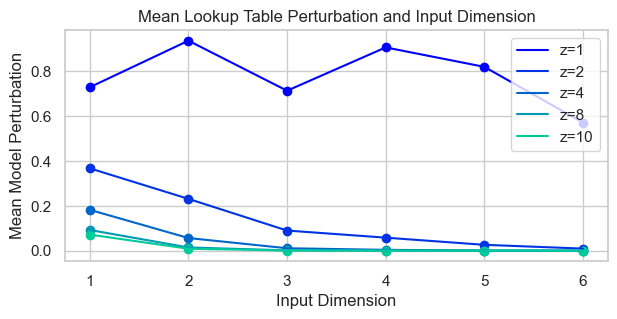

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

partitions = [1, 2, 4, 8, 10]

# Create a color map with a gradient based on the number of partitions
color_map = cm.get_cmap('winter', len(partitions)+1)

plt.figure(figsize=(7,3))

for i, partition in enumerate(partitions):
    # Create a list of model names corresponding to ABEL-Splines for the current partition
    abel_spline_models = [f"model_{i}_perturbations" for i in range(5 + (i*3), 19, 15)]

    # Initialize an empty dataframe
    df = pd.DataFrame()

    # Loop through the dimensions and add their perturbation values to the dataframe
    for input_dimension in range(1, 7):
        perturbation_values = df_dict[input_dimension][False]['sgd'][abel_spline_models[0]]
        
        # Add perturbation values to the dataframe with dimension number as column name
        df[f"{input_dimension}D"] = perturbation_values

    # Calculate the mean perturbation values for each dimension
    mean_perturbations = [df[label].mean() for label in df.columns]

    # Create a scatterplot with lineplot connecting the points, using the same color for both
    color = color_map(i)  # Get color from colormap based on partition index
    plt.plot(range(1, 7), mean_perturbations, color=color)

plt.legend([f'z={p}' for p in partitions], loc='upper right')

for i, partition in enumerate(partitions):
    # Create a list of model names corresponding to ABEL-Splines for the current partition
    abel_spline_models = [f"model_{i}_perturbations" for i in range(5 + (i*3), 19, 15)]

    # Initialize an empty dataframe
    df = pd.DataFrame()

    # Loop through the dimensions and add their perturbation values to the dataframe
    for input_dimension in range(1, 7):
        perturbation_values = df_dict[input_dimension][False]['sgd'][abel_spline_models[0]]
        
        # Add perturbation values to the dataframe with dimension number as column name
        df[f"{input_dimension}D"] = perturbation_values

    # Calculate the mean perturbation values for each dimension
    mean_perturbations = [df[label].mean() for label in df.columns]

    # Create a scatterplot with lineplot connecting the points, using the same color for both
    color = color_map(i)  # Get color from colormap based on partition index
    plt.scatter(range(1, 7), mean_perturbations, color=color)

    

plt.xlabel('Input Dimension')
plt.ylabel('Mean Model Perturbation')
plt.title('Mean Lookup Table Perturbation and Input Dimension')

plt.savefig("lookup_line_plot_input_dimension_influence", dpi=300, bbox_inches='tight')

plt.show()

# Deprecated Work

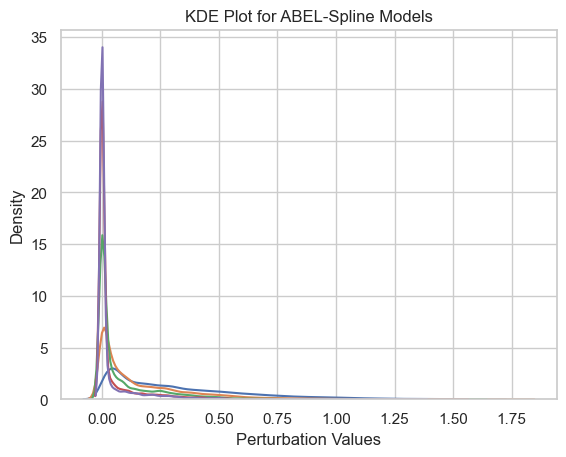

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of model names corresponding to ABEL-Splines
abel_spline_models = [f"model_{i}_perturbations" for i in range(6, 19, 3)]

# Initialize an empty dataframe
df = pd.DataFrame()

# Loop through the ABEL-Spline models and add their perturbation values to the dataframe
for model_name in abel_spline_models:
    perturbation_values = df_dict[3][False]['sgd'][model_name]  # Replace with desired dimension and optimizer
    
    # Extract partition number from model name using regex
    partition_num = int(re.search(r'\(z=(\d+)\)', perturbation_labels_dict[model_name]).group(1))
    
    # Add perturbation values to the dataframe with partition number as column name
    df[perturbation_labels_dict[model_name]] = perturbation_values

# Create a single figure with multiple subplots for each partition number
fig, ax = plt.subplots()

# Iterate through each column (partition) in the dataframe and plot kdeplot on the same set of axes
for col in df.columns:
    sns.kdeplot(data=df[col], ax=ax)

# Set labels and title for the plot
ax.set_xlabel('Perturbation Values')
ax.set_ylabel('Density')
ax.set_title('KDE Plot for ABEL-Spline Models')

# Show the plot
plt.show()

In [3]:

import matplotlib.pyplot as plt

# Get the data for ABEL-Spline model with SGD optimizer
data = df_dict[3][False]['sgd']['model_7_perturbations']

# Calculate the mean perturbation values as a function of partition number
mean_perturbations = data.groupby('partition_num')['perturbation_value'].mean()

# Create scatter plot
plt.scatter(mean_perturbations.index, mean_perturbations.values, color='blue')
# Create line plot
plt.plot(mean_perturbations.index, mean_perturbations.values, color='red')

plt.xlabel('Partition Number')
plt.ylabel('Mean Perturbation Value')
plt.title('Mean Model Perturbation Values for ABEL-Spline Model with SGD Optimizer')

plt.show()

KeyError: 'partition_num'

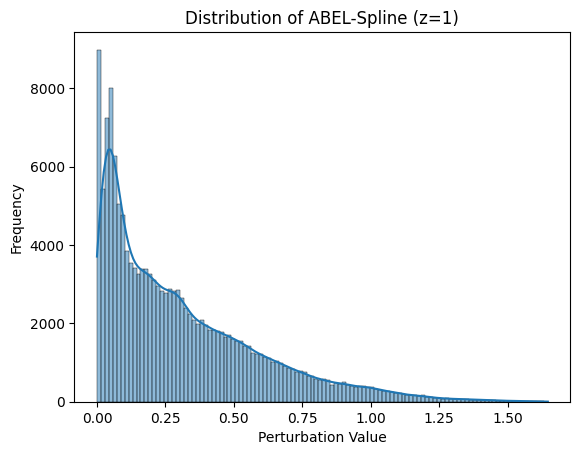

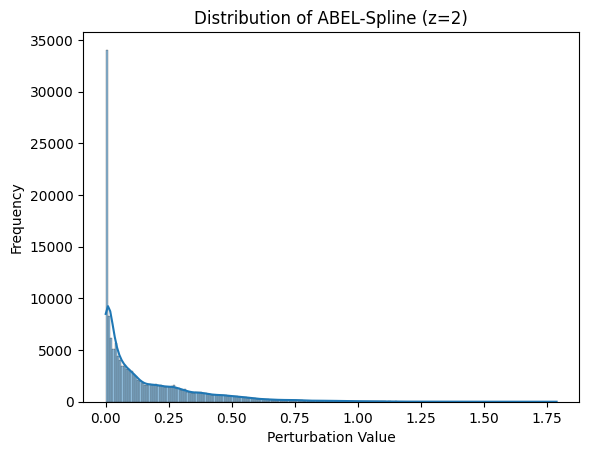

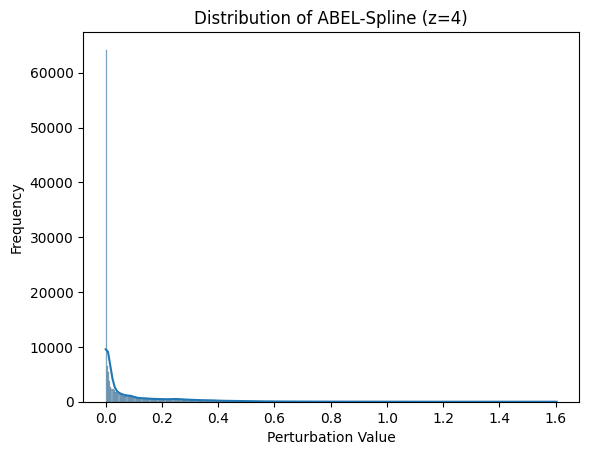

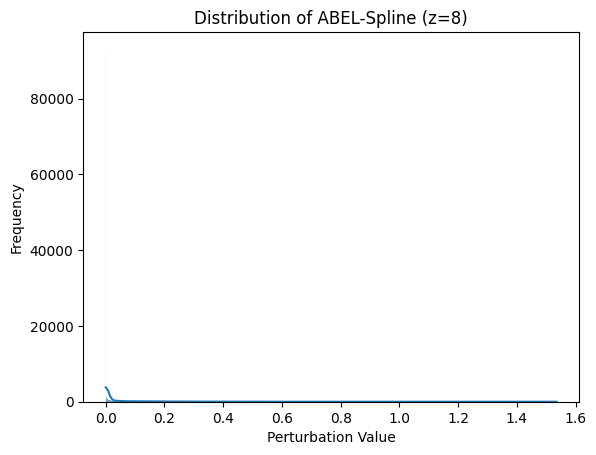

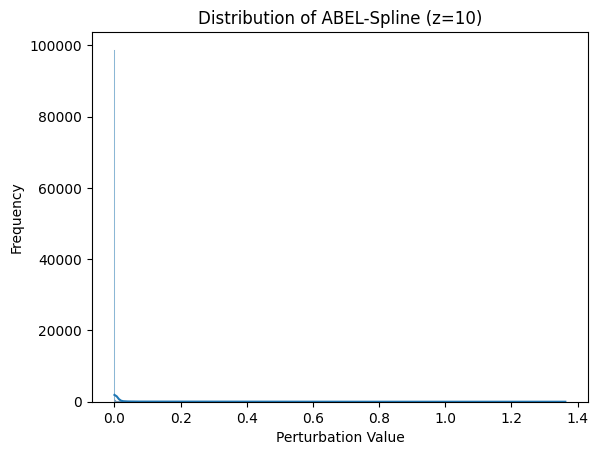

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of model names corresponding to ABEL-Splines
abel_spline_models = [f"model_{i}_perturbations" for i in range(6, 19, 3)]

# Initialize an empty dataframe
df = pd.DataFrame()

# Loop through the ABEL-Spline models and add their perturbation values to the dataframe
for model_name in abel_spline_models:
    perturbation_values = df_dict[3][False]['sgd'][model_name]  # Replace with desired dimension and optimizer
    
    # Extract partition number from model name using regex
    partition_num = int(re.search(r'\(z=(\d+)\)', perturbation_labels_dict[model_name]).group(1))
    
    # Add perturbation values to the dataframe with partition number as column name
    df[perturbation_labels_dict[model_name]] = perturbation_values

# Plot histogram for each partition number using seaborn
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Perturbation Value")
    plt.ylabel("Frequency")
    plt.show()

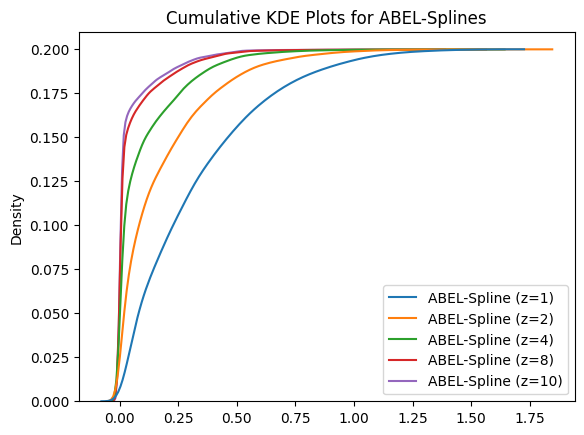

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of model names corresponding to ABEL-Splines
abel_spline_models = [f"model_{i}_perturbations" for i in range(6, 19, 3)]

# Initialize an empty dataframe
df = pd.DataFrame()

# Loop through the ABEL-Spline models and add their perturbation values to the dataframe
for model_name in abel_spline_models:
    perturbation_values = df_dict[3][False]['sgd'][model_name]  # Replace with desired dimension and optimizer
    
    # Extract partition number from model name using regex
    partition_num = int(re.search(r'\(z=(\d+)\)', perturbation_labels_dict[model_name]).group(1))
    
    # Add perturbation values to the dataframe with partition number as column name
    df[perturbation_labels_dict[model_name]] = perturbation_values

# Create cumulative kdeplots for each partition number on the same set of axes
sns.kdeplot(data=df, cumulative=True)

# Set plot title and labels
plt.title("Cumulative KDE Plots for ABEL-Splines")

plt.show()

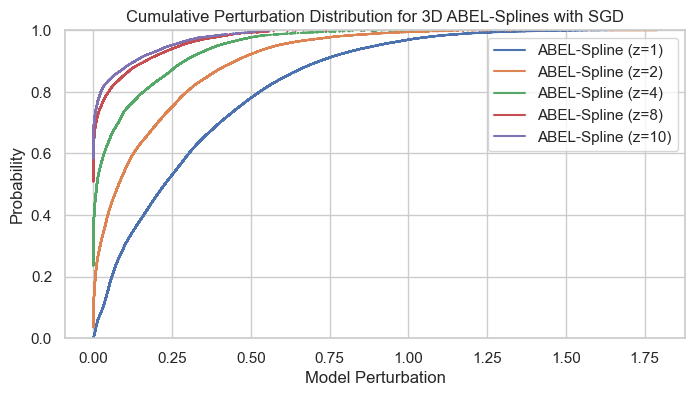

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the cumulative distribution for each partition number
cumulative_distributions = df.apply(lambda x: x.value_counts(normalize=True).sort_index().cumsum())

# Plot the cumulative distributions
sns.set(style="whitegrid")
plt.figure(figsize=(8,4))
# Iterate through each partition number and plot its cumulative distribution
for partition_num in [1, 2, 4, 8, 10]:
    plt.plot(cumulative_distributions[f"ABEL-Spline (z={partition_num})"], label=f"ABEL-Spline (z={partition_num})")

plt.title("Cumulative Perturbation Distribution for 3D ABEL-Splines with SGD")
plt.xlabel("Model Perturbation")
plt.ylabel("Probability")
plt.ylim(0, 1)
plt.legend()
plt.show()

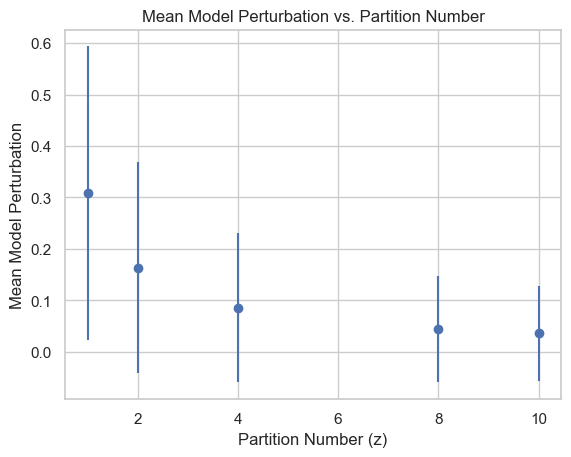

In [26]:
import matplotlib.pyplot as plt

# Calculate the mean and standard deviation of perturbation values for each partition number
mean_perturbations = [df[label].mean() for label in df.columns]
std_perturbations = [df[label].std() for label in df.columns]

# Create a scatterplot with error bars
plt.errorbar([1, 2, 4, 8, 10], mean_perturbations, yerr=std_perturbations, fmt='o')
plt.xlabel('Partition Number (z)')
plt.ylabel('Mean Model Perturbation')
plt.title('Mean Model Perturbation vs. Partition Number')
plt.show()

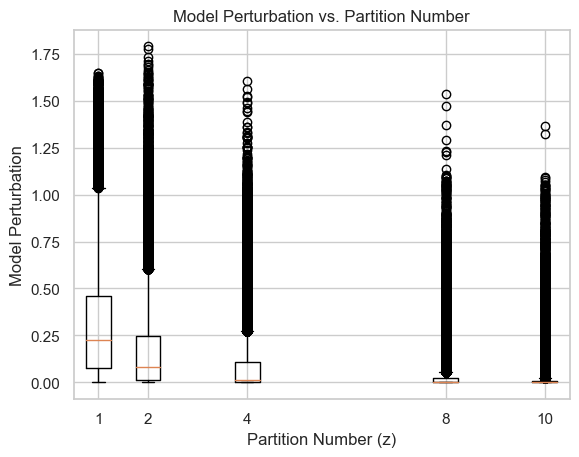

In [27]:
import matplotlib.pyplot as plt

# Calculate the perturbation values for each partition number
perturbations = [df[label] for label in df.columns]

# Create a boxplot with whisker plots for the quartiles
plt.boxplot(perturbations, positions=[1, 2, 4, 8, 10])
plt.xlabel('Partition Number (z)')
plt.ylabel('Model Perturbation')
plt.title('Model Perturbation vs. Partition Number')
plt.xticks([1, 2, 4, 8, 10], ['1', '2', '4', '8', '10'])
plt.show()

In [29]:
import matplotlib.pyplot as plt

# Create a list to store the perturbation values for each partition number
perturbation_values = [[] for _ in range(5)]

# Loop through the ABEL-Spline models and add their perturbation values to the corresponding partition number
for model_name in abel_spline_models:
    partition_num = int(re.search(r'\(z=(\d+)\)', perturbation_labels_dict[model_name]).group(1))
    perturbation_values[partition_num - 1].extend(df[perturbation_labels_dict[model_name]])

# Create a whisker plot for each partition number
plt.boxplot(perturbation_values, labels=[1, 2, 4, 8, 10])
plt.xlabel('Partition Number (z)')
plt.ylabel('Model Perturbation')
plt.title('Model Perturbation by Partition Number')
plt.show()

IndexError: list index out of range

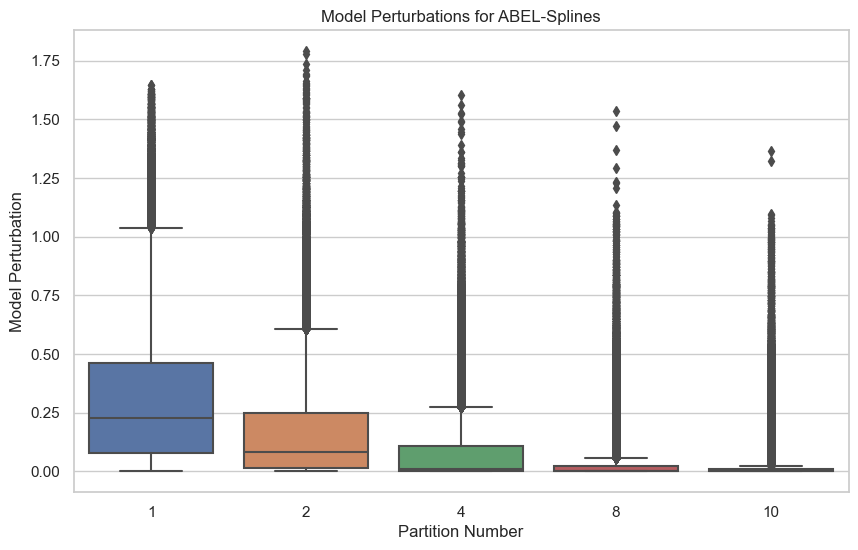

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of partition numbers
partition_numbers = [1, 2, 4, 8, 10]

# Initialize an empty list to store perturbation values for each partition number
perturbation_values_per_partition = []

# Loop through the partition numbers and extract the corresponding perturbation values from the dataframe
for partition_num in partition_numbers:
    column_name = f"ABEL-Spline (z={partition_num})"
    perturbation_values = df[column_name]
    perturbation_values_per_partition.append(perturbation_values)

# Create a boxplot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=perturbation_values_per_partition)
plt.xlabel("Partition Number")
plt.ylabel("Model Perturbation")
plt.title("Model Perturbations for ABEL-Splines")
plt.xticks(range(len(partition_numbers)), partition_numbers)
plt.show()

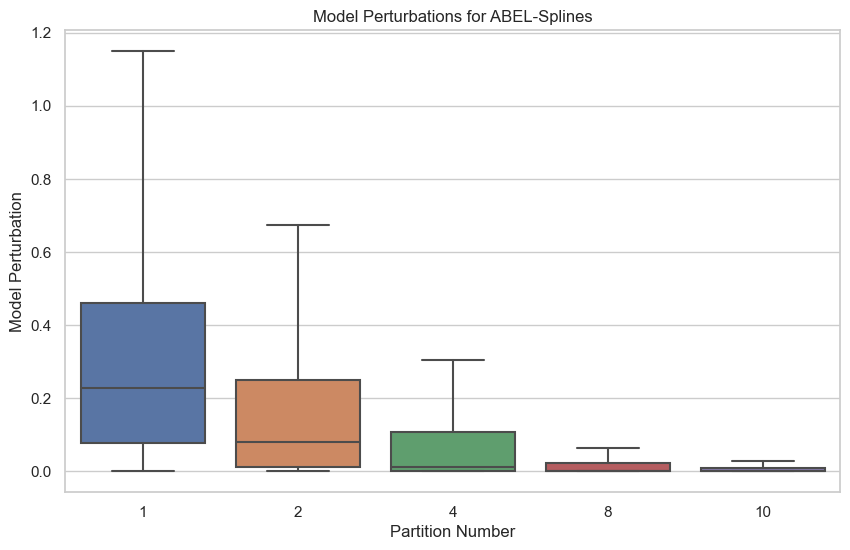

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of partition numbers
partition_numbers = [1, 2, 4, 8, 10]

# Initialize an empty list to store perturbation values for each partition number
perturbation_values_per_partition = []

# Loop through the partition numbers and extract the corresponding perturbation values from the dataframe
for partition_num in partition_numbers:
    column_name = f"ABEL-Spline (z={partition_num})"
    perturbation_values = df[column_name]
    perturbation_values_per_partition.append(perturbation_values)

# Calculate minimum and maximum values across all partitions
min_value = min(df.min())
max_value = max(df.max())

# Calculate interquartile range (IQR) across all partitions
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

# Adjust whisker length based on IQR if there are no outliers
#if len(df[df < q1 - 1.5*iqr]) == 0 and len(df[df > q3 + 1.5*iqr]) == 0:
whis = max_value - min_value

# Create a boxplot using seaborn with showfliers=False and adjusted whisker length
plt.figure(figsize=(10, 6))
sns.boxplot(data=perturbation_values_per_partition, showfliers=False, whis=whis)
plt.xlabel("Partition Number")
plt.ylabel("Model Perturbation")
plt.title("Model Perturbations for ABEL-Splines")
plt.xticks(range(len(partition_numbers)), partition_numbers)
plt.show()

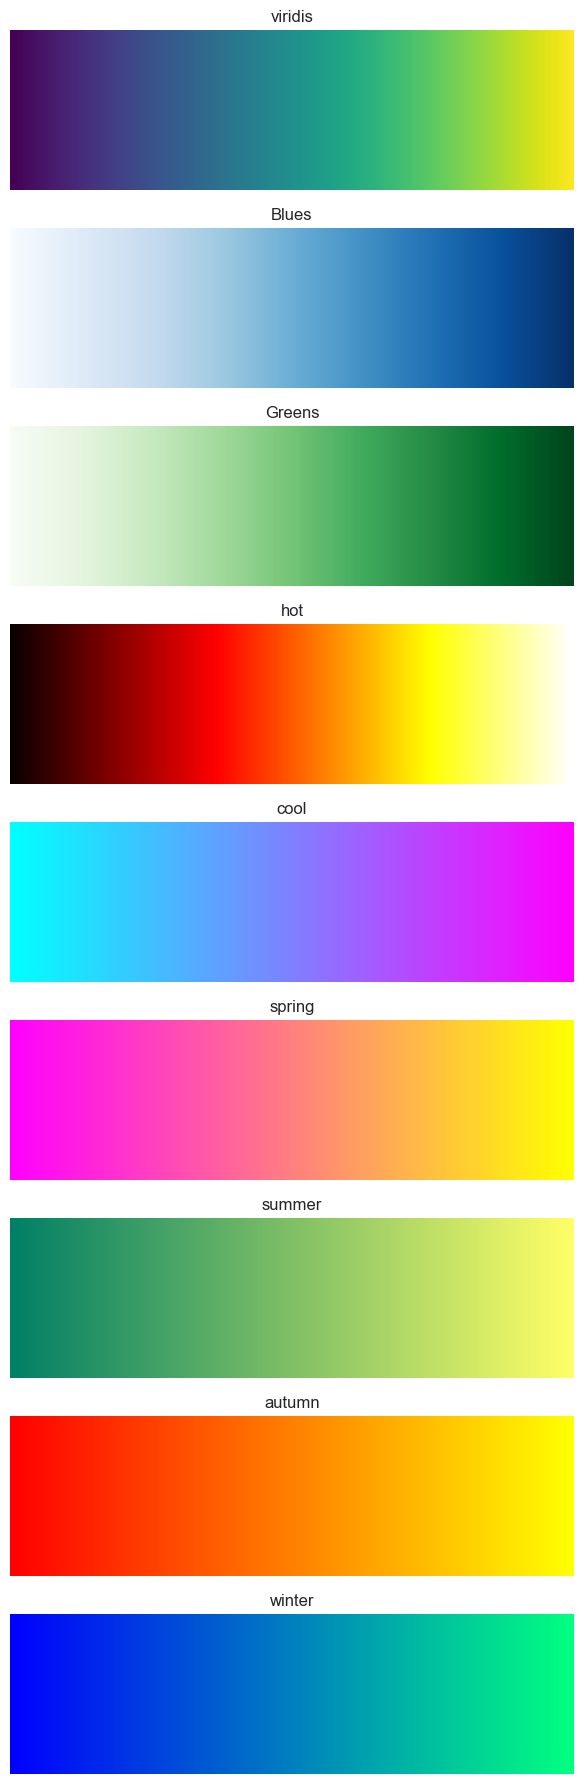

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# List of colormaps to display
colormaps = ['viridis', 'Blues', 'Greens', 'hot', 'cool', 'spring', 'summer', 'autumn', 'winter']

fig, axs = plt.subplots(len(colormaps), 1, figsize=(6, 2 * len(colormaps)))

# Loop through each colormap and plot a gradient using a range of values
for i, cmap in enumerate(colormaps):
    ax = axs[i]
    gradient = np.linspace(0, 1, 256).reshape(1, -1)
    ax.imshow(gradient, aspect='auto', cmap=cmap)
    ax.set_axis_off()
    ax.set_title(cmap)

plt.tight_layout()
plt.show()

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

partitions = [1, 2, 4, 8, 10]

# Create a color map with a gradient based on the number of partitions
color_map = cm.get_cmap('winter', len(partitions)+1)

plt.figure(figsize=(7,3))

for i, partition in enumerate(partitions):
    # Create a list of model names corresponding to ABEL-Splines for the given partition number
    abel_spline_models = [f"model_{i}_perturbations" for i in range(6 + (i * 3), 19, 15)]

    # Initialize an empty dataframe
    df = pd.DataFrame()

    # Loop through the ABEL-Spline models and add their perturbation values to the dataframe
    for model_name in abel_spline_models:
        perturbation_values = [df_dict[dim][False]['sgd'][model_name] for dim in range(1, 7)] 

        # Add perturbation values to the dataframe with input dimension as column name
        df[perturbation_labels_dict[model_name]] = perturbation_values

    # Calculate the mean perturbation values for each input dimension
    mean_perturbations = [df.iloc[:, j].mean() for j in range(len(df.columns))]

    # Create a scatterplot with lineplot connecting the points, using the same color for both
    color = color_map(i)  # Get color from colormap based on partition index
    plt.plot(range(1, 7), mean_perturbations, color=color)

plt.legend([f"z={z}" for z in partitions], loc='upper right')

for i, partition in enumerate(partitions):
    # Create a list of model names corresponding to ABEL-Splines for the given partition number
    abel_spline_models = [f"model_{i}_perturbations" for i in range(6 + (i * 3), 19, 15)]

    # Initialize an empty dataframe
    df = pd.DataFrame()

    # Loop through the ABEL-Spline models and add their perturbation values to the dataframe
    for model_name in abel_spline_models:
        perturbation_values = [df_dict[dim][False]['sgd'][model_name] for dim in range(1, 7)] 

        # Add perturbation values to the dataframe with input dimension as column name
        df[perturbation_labels_dict[model_name]] = perturbation_values

    # Calculate the mean perturbation values for each input dimension
    mean_perturbations = [df.iloc[:, j].mean() for j in range(len(df.columns))]

    # Create a scatterplot with lineplot connecting the points, using the same color for both
    color = color_map(i)  # Get color from colormap based on partition index
    plt.scatter(range(1, 7), mean_perturbations, color=color)

plt.xlabel('Input Dimension')
plt.ylabel('Mean Model Perturbation')
plt.title('Mean ABEL-Splines Perturbation by Input Dimension and Partition Number')

#plt.savefig("abel_spline_line_plot_input_dimension_influence", dpi=300, bbox_inches='tight')

plt.show()

C:\Users\Heinrich\AppData\Local\Temp\ipykernel_20036\2793526883.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('winter', len(partitions)+1)


TypeError: cannot convert the series to <class 'float'>

<Figure size 700x300 with 0 Axes>

C:\Users\Heinrich\AppData\Local\Temp\ipykernel_20036\1855253522.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('winter', len(partitions)+1)


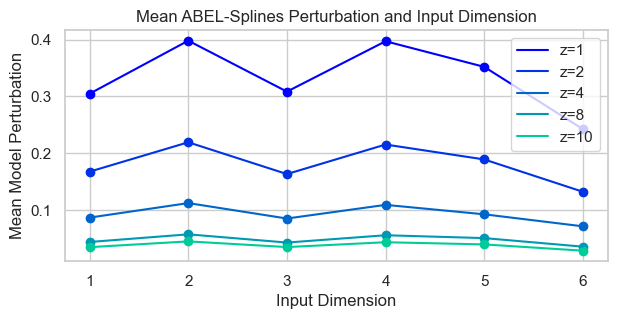

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

partitions = [1, 2, 4, 8, 10]

# Create a color map with a gradient based on the number of partitions
color_map = cm.get_cmap('winter', len(partitions)+1)

plt.figure(figsize=(7,3))

for i, partition in enumerate(partitions):
    # Create a list of model names corresponding to ABEL-Splines for the current partition
    abel_spline_models = [f"model_{i}_perturbations" for i in range(6 + (i*3), 19, 15)]

    # Initialize an empty dataframe
    df = pd.DataFrame()

    # Loop through the dimensions and add their perturbation values to the dataframe
    for input_dimension in range(1, 7):
        perturbation_values = df_dict[input_dimension][False]['sgd'][abel_spline_models[0]]
        
        # Add perturbation values to the dataframe with dimension number as column name
        df[f"{input_dimension}D"] = perturbation_values

    # Calculate the mean perturbation values for each dimension
    mean_perturbations = [df[label].mean() for label in df.columns]

    # Create a scatterplot with lineplot connecting the points, using the same color for both
    color = color_map(i)  # Get color from colormap based on partition index
    plt.plot(range(1, 7), mean_perturbations, color=color)

plt.legend([f'z={p}' for p in partitions], loc='upper right')

for i, partition in enumerate(partitions):
    # Create a list of model names corresponding to ABEL-Splines for the current partition
    abel_spline_models = [f"model_{i}_perturbations" for i in range(6 + (i*3), 19, 15)]

    # Initialize an empty dataframe
    df = pd.DataFrame()

    # Loop through the dimensions and add their perturbation values to the dataframe
    for input_dimension in range(1, 7):
        perturbation_values = df_dict[input_dimension][False]['sgd'][abel_spline_models[0]]
        
        # Add perturbation values to the dataframe with dimension number as column name
        df[f"{input_dimension}D"] = perturbation_values

    # Calculate the mean perturbation values for each dimension
    mean_perturbations = [df[label].mean() for label in df.columns]

    # Create a scatterplot with lineplot connecting the points, using the same color for both
    color = color_map(i)  # Get color from colormap based on partition index
    plt.scatter(range(1, 7), mean_perturbations, color=color)

plt.xlabel('Input Dimension')
plt.ylabel('Mean Model Perturbation')
plt.title('Mean ABEL-Splines Perturbation and Input Dimension')

plt.savefig("abel_spline_line_plot_input_dimension_influence", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

partitions = [1, 2, 4, 8, 10]

# Create a color map with a gradient based on the number of partitions
color_map = cm.get_cmap('winter', len(partitions)+1)

plt.figure(figsize=(7,3))

for i, partition in enumerate(partitions):
    # Create a list of model names corresponding to ABEL-Splines for the current partition
    abel_spline_models = [f"model_{i}_perturbations" for i in range(6 + (i*3), 19, 15)]

    # Initialize an empty dataframe
    df = pd.DataFrame()

    # Loop through the dimensions and add their perturbation values to the dataframe
    for input_dimension in range(1, 7):
        perturbation_values = df_dict[input_dimension][False]['sgd'][abel_spline_models[0]]
        
        # Add perturbation values to the dataframe with dimension number as column name
        df[f"{input_dimension}D"] = perturbation_values

    # Calculate the mean perturbation values for each dimension
    mean_perturbations = [df[label].mean() for label in df.columns]

    # Create a scatterplot with lineplot connecting the points, using the same color for both
    color = color_map(i)  # Get color from colormap based on partition index
    plt.plot(range(1, 7), mean_perturbations, color=color)

plt.legend([f'z={p}' for p in partitions], loc='upper right')

for i, partition in enumerate(partitions):
    # Create a list of model names corresponding to ABEL-Splines for the current partition
    abel_spline_models = [f"model_{i}_perturbations" for i in range(6 + (i*3), 19, 15)]

    # Initialize an empty dataframe
    df = pd.DataFrame()

    # Loop through the dimensions and add their perturbation values to the dataframe
    for input_dimension in range(1, 7):
        perturbation_values = df_dict[input_dimension][False]['sgd'][abel_spline_models[0]]
        
        # Add perturbation values to the dataframe with dimension number as column name
        df[f"{input_dimension}D"] = perturbation_values

    # Calculate the mean perturbation values for each dimension
    mean_perturbations = [df[label].mean() for label in df.columns]

    # Create a scatterplot with lineplot connecting the points, using the same color for both
    color = color_map(i)  # Get color from colormap based on partition index
    plt.scatter(range(1, 7), mean_perturbations, color=color)

plt.xlabel('Input Dimension')
plt.ylabel('Mean Model Perturbation')
plt.title('Mean ABEL-Splines Perturbation and Input Dimension')

plt.savefig("abel_spline_line_plot_input_dimension_influence", dpi=300, bbox_inches='tight')

plt.show()